<a href="https://colab.research.google.com/github/maddiejane25/Project-1/blob/dev/JK_Alzheimers_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# **IMPORT AND READ DATA**

In [ ]:
# Upload the csv file
from google.colab import files
uploaded = files.upload()

Saving alzheimers_disease_data.csv to alzheimers_disease_data (3).csv


In [ ]:
# Import the csv file
alzheimer_df = pd.read_csv('alzheimers_disease_data.csv')
alzheimer_df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [ ]:
# Get info
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
# Search for missing or duplicate data
print('Null:', alzheimer_df.isnull().sum().sum())
print('Duplicate:', alzheimer_df.duplicated().sum())

Null: 0
Duplicate: 0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Drop columns
alzheimer_df.drop((['DoctorInCharge']), axis = 1, inplace = True)

In [ ]:
# Change Binary Columns from 0/1 to No/Yes
alzheimer_df_yesno = alzheimer_df.copy()
alzheimer_df_yesno[['Smoking', 'FamilyHistoryAlzheimers',
                                   'CardiovascularDisease', 'Diabetes',
                                   'Depression', 'HeadInjury', 'Hypertension',
                                   'MemoryComplaints', 'BehavioralProblems',
                                   'Confusion', 'Disorientation', 'PersonalityChanges',
                                   'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']] = alzheimer_df[['Smoking', 'FamilyHistoryAlzheimers',
                                   'CardiovascularDisease', 'Diabetes',
                                   'Depression', 'HeadInjury', 'Hypertension',
                                   'MemoryComplaints', 'BehavioralProblems',
                                   'Confusion', 'Disorientation', 'PersonalityChanges',
                                   'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']].replace({0: 'No', 1: 'Yes'})

# Change Gender column
alzheimer_df_yesno['Gender'] = alzheimer_df['Gender'].replace({0: 'Male', 1: 'Female'})

# Change Ethnicity column
alzheimer_df_yesno['Ethnicity'] = alzheimer_df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

# Change EducationLevel column
alzheimer_df_yesno['EducationLevel'] = alzheimer_df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: 'Bachelors', 3: 'Higher'})

# Display Changes
alzheimer_df_yesno.head(10)

PatientID  Age  Gender         Ethnicity EducationLevel        BMI Smoking  \
0       4751   73    Male         Caucasian      Bachelors  22.927749      No   
1       4752   89    Male         Caucasian           None  26.827681      No   
2       4753   73    Male             Other    High School  17.795882      No   
3       4754   74  Female         Caucasian    High School  33.800817     Yes   
4       4755   89    Male         Caucasian           None  20.716974      No   
5       4756   86  Female  African American    High School  30.626886      No   
6       4757   68    Male             Other      Bachelors  38.387622     Yes   
7       4758   75    Male         Caucasian    High School  18.776009      No   
8       4759   72  Female  African American           None  27.833188      No   
9       4760   87    Male         Caucasian           None  35.456302     Yes   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0           13.297218          6.327112     1.347214  ...   
1            4.542524          7.619885     0.518767  ...   
2           19.555085          7.844988     1.826335  ...   
3           12.209266          8.428001     7.435604  ...   
4           18.454356          6.310461     0.795498  ...   
5            4.140144          0.211062     1.584922  ...   
6            0.646047          9.257695     5.897388  ...   
7           13.723826          4.649451     8.341903  ...   
8           12.167848          1.531360     6.736882  ...   
9           16.028688          6.440773     8.086019  ...   

   FunctionalAssessment MemoryComplaints BehavioralProblems       ADL  \
0              6.518877               No                 No  1.725883   
1              7.118696               No                 No  2.592424   
2              5.895077               No                 No  7.119548   
3              8.965106               No                Yes  6.481226   
4              6.045039               No                 No  0.014691   
5              5.510144               No                 No  9.015686   
6              6.062124               No                 No  9.236328   
7              3.401374               No                 No  4.517248   
8              7.396061               No                Yes  0.756232   
9              1.148904               No                Yes  4.554394   

  Confusion Disorientation PersonalityChanges  DifficultyCompletingTasks  \
0        No             No                 No                        Yes   
1        No             No                 No                         No   
2        No            Yes                 No                        Yes   
3        No             No                 No                         No   
4        No             No                Yes                        Yes   
5       Yes             No                 No                         No   
6        No             No                 No                         No   
7       Yes             No                 No                         No   
8        No             No                Yes                         No   
9        No             No                 No                         No   

   Forgetfulness  Diagnosis  
0             No         No  
1            Yes         No  
2             No         No  
3             No         No  
4             No         No  
5             No         No  
6            Yes         No  
7            Yes        Yes  
8             No         No  
9             No         No  

[10 rows x 34 columns]

Individuals in the dataset who were diagnosed with Alzheimer's: 760
Individuals in the dataset who were NOT diagnosed with Alzheimer's: 1389


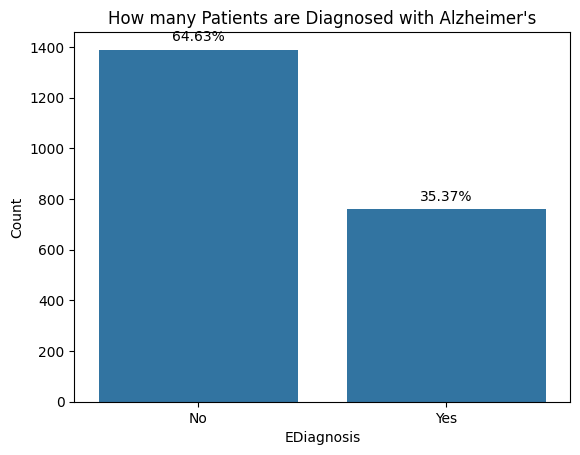

In [ ]:
# How many individuals from the data set have been diagnosed with Alzheimers?
print("Individuals in the dataset who were diagnosed with Alzheimer\'s:", alzheimer_df_yesno[alzheimer_df_yesno['Diagnosis'] == 'Yes'].shape[0])
print("Individuals in the dataset who were NOT diagnosed with Alzheimer\'s:", alzheimer_df_yesno[alzheimer_df_yesno['Diagnosis'] == 'No'].shape[0])

# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Education Level vs Diagnosis
ax = sns.countplot(x='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('How many Patients are Diagnosed with Alzheimer\'s')
plt.xlabel('EDiagnosis')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

# **DEMOGRAPHICS**
* Age
* Gender
* Ethnicity
* Education Level





In [ ]:
# Make a smaller dataset for Demographics
demographics = alzheimer_df_yesno[['Diagnosis','Age', 'Gender', 'Ethnicity', 'EducationLevel']]
demographics.head()

Diagnosis  Age  Gender  Ethnicity EducationLevel
0        No   73    Male  Caucasian      Bachelors
1        No   89    Male  Caucasian           None
2        No   73    Male      Other    High School
3        No   74  Female  Caucasian    High School
4        No   89    Male  Caucasian           None

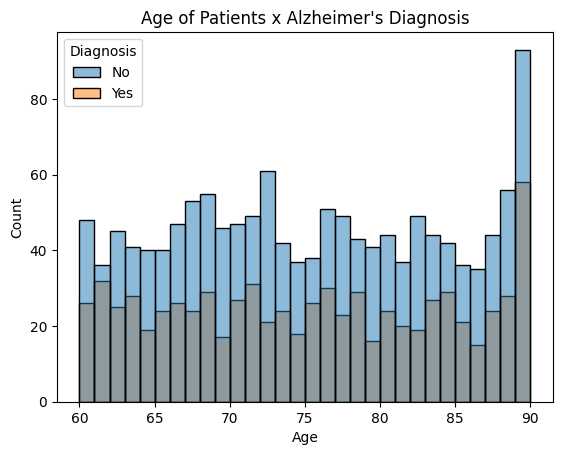

In [ ]:
# Age Distribution by Diagnosis
sns.histplot(data=alzheimer_df_yesno, x='Age', hue='Diagnosis', binwidth=1)
plt.title('Age of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

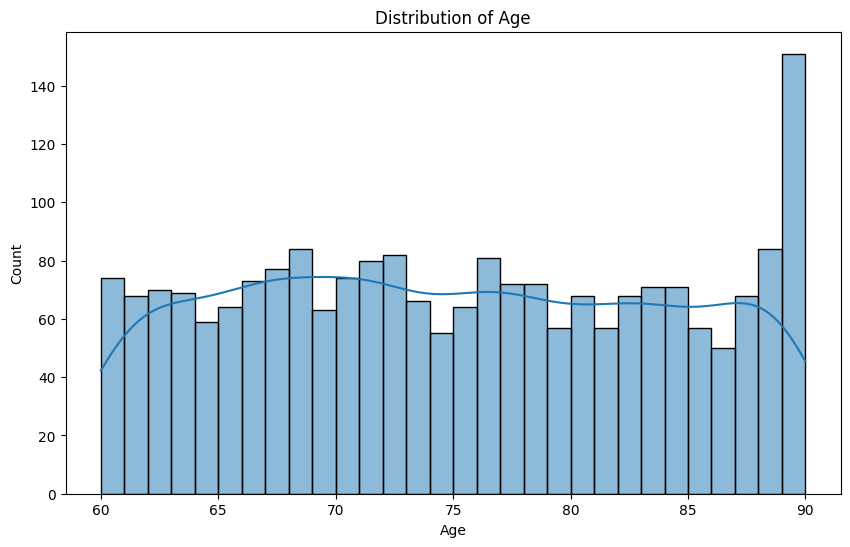

In [ ]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(alzheimer_df['Age'], bins=30 , kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

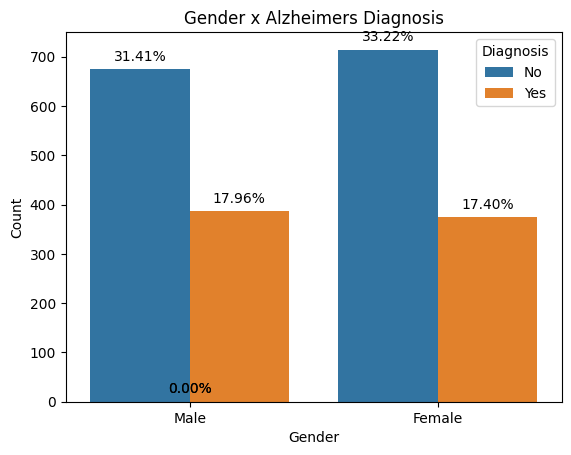

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Gender vs Diagnosis
ax = sns.countplot(x='Gender', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Gender x Alzheimers Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

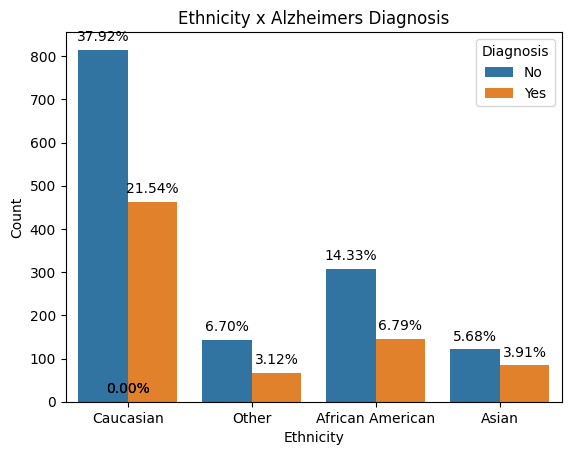

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Ethnicity vs Diagnosis
ax = sns.countplot(x='Ethnicity', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Ethnicity x Alzheimers Diagnosis')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

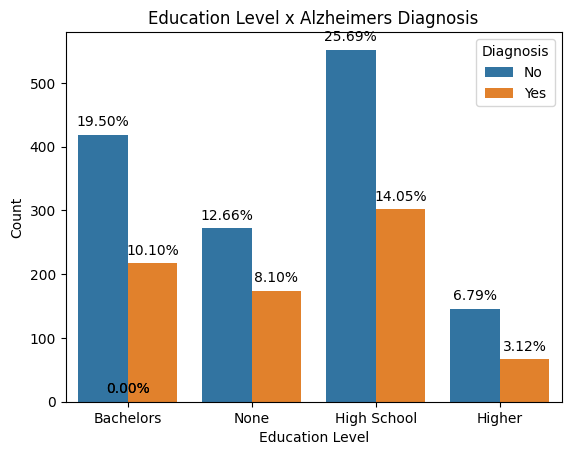

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Education Level vs Diagnosis
ax = sns.countplot(x='EducationLevel', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Education Level x Alzheimers Diagnosis')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

# **ASSESSMENTS**
* MMSE
* Functional Assessment
* ADL

In [ ]:
#Make a data frame with diagnosis and assessments
assessments = alzheimer_df[['Diagnosis','MMSE','FunctionalAssessment', 'ADL']]
assessments.head()

Diagnosis       MMSE  FunctionalAssessment       ADL
0          0  21.463532              6.518877  1.725883
1          0  20.613267              7.118696  2.592424
2          0   7.356249              5.895077  7.119548
3          0  13.991127              8.965106  6.481226
4          0  13.517609              6.045039  0.014691

In [ ]:
# Replace the 0 values with No and 1 values with Yes in the Diagnosis column
assessments['Diagnosis'] = assessments['Diagnosis'].replace({0: 'No', 1: 'Yes'})
assessments.head()

<ipython-input-95-12799b757d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assessments['Diagnosis'] = assessments['Diagnosis'].replace({0: 'No', 1: 'Yes'})


Diagnosis       MMSE  FunctionalAssessment       ADL
0        No  21.463532              6.518877  1.725883
1        No  20.613267              7.118696  2.592424
2        No   7.356249              5.895077  7.119548
3        No  13.991127              8.965106  6.481226
4        No  13.517609              6.045039  0.014691

In [ ]:
#Plot the MMSE and Diagnosis data
alt.Chart(assessments).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('MMSE:Q', scale=alt.Scale(domain=[0, 30])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Plot the FunctionalAssessment and Diagnosis data
alt.Chart(assessments).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('FunctionalAssessment:Q', scale=alt.Scale(domain=[0, 10])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Plot the ADL and Diagnosis data
alt.Chart(assessments).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('ADL:Q', scale=alt.Scale(domain=[0, 10])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# **LIFESTYLE**
* BMI
* Smoking
* Alcohol Consumption
* Pyhsical Activity
* Diet Quality
* Sleep Quality

# **MEDICAL HISTORY**
* Family History Alzheimers
* Cardiovascular Disease
* Diabetes
* Depression
* Head Injury
* Hypertension

In [ ]:
# Make a smaller dataset for medical_history
medical_history = alzheimer_df_yesno[['Diagnosis',
                                'FamilyHistoryAlzheimers',
                                'CardiovascularDisease',
                                'Diabetes',
                                'Depression',
                                'HeadInjury',
                                'Hypertension']]
medical_history.head()

Diagnosis FamilyHistoryAlzheimers CardiovascularDisease Diabetes Depression  \
0        No                      No                    No      Yes        Yes   
1        No                      No                    No       No         No   
2        No                     Yes                    No       No         No   
3        No                      No                    No       No         No   
4        No                      No                    No       No         No   

  HeadInjury Hypertension  
0         No           No  
1         No           No  
2         No           No  
3         No           No  
4         No           No

Text(0, 0.5, 'Count')

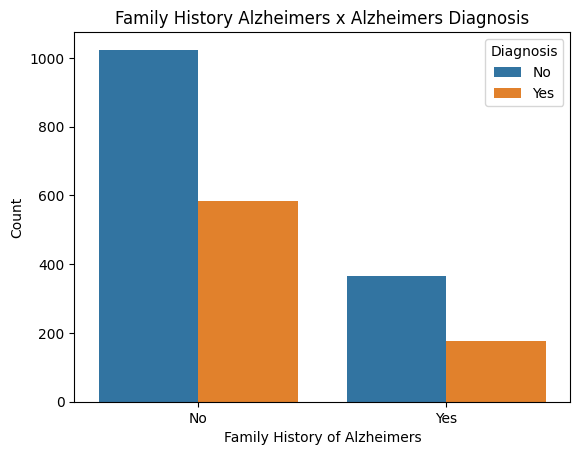

In [ ]:
# Plot a countplot of Family History vs Diagnosis
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=medical_history)
plt.title('Family History Alzheimers x Alzheimers Diagnosis')
plt.xlabel('Family History of Alzheimers')
plt.ylabel('Count')

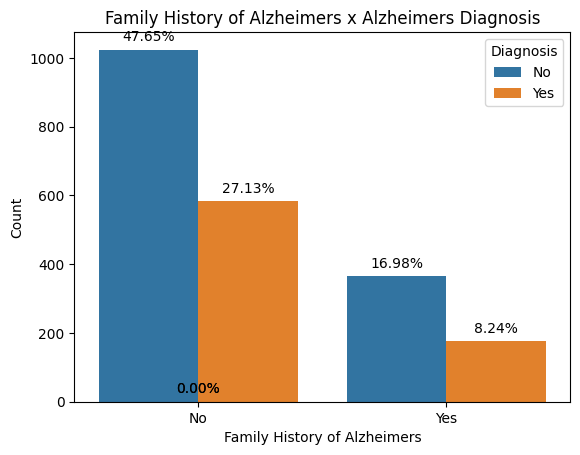

In [ ]:
# Plot a countplot of Family history vs Alzheimers
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Family History of Alzheimers x Alzheimers Diagnosis')
plt.xlabel('Family History of Alzheimers')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

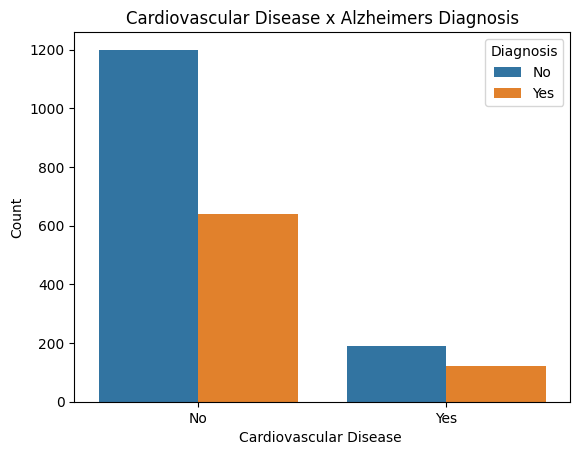

In [ ]:
# Plot a countplot of Cardiovascular Disease vs Diagnosis

sns.countplot(x='CardiovascularDisease', hue='Diagnosis', data=medical_history)
plt.title('Cardiovascular Disease x Alzheimers Diagnosis')
plt.xlabel('Cardiovascular Disease ')
plt.ylabel('Count')

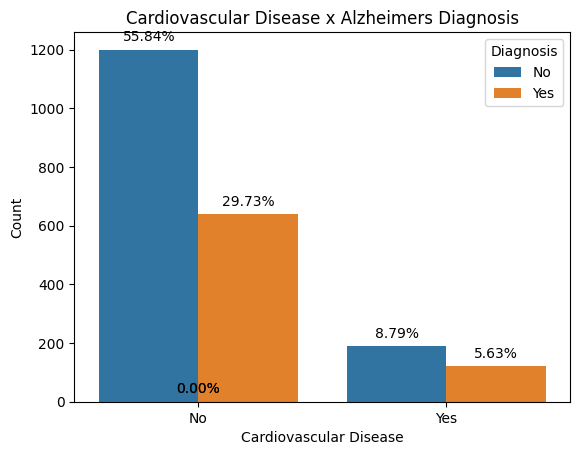

In [ ]:

# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='CardiovascularDisease', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Cardiovascular Disease x Alzheimers Diagnosis')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

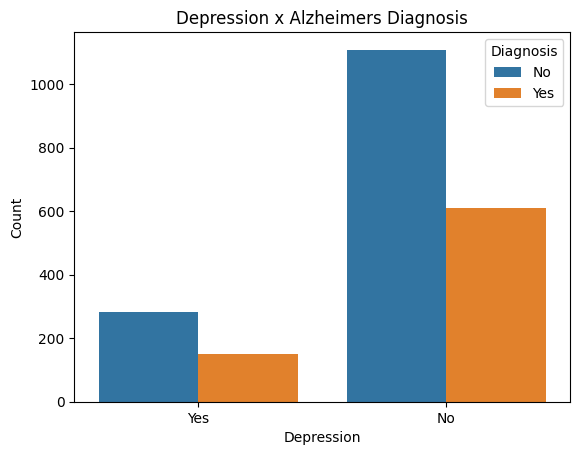

In [ ]:
# Plot a countplot of Depression vs Diagnosis

sns.countplot(x='Depression', hue='Diagnosis', data=medical_history)
plt.title('Depression x Alzheimers Diagnosis')
plt.xlabel('Depression')
plt.ylabel('Count')

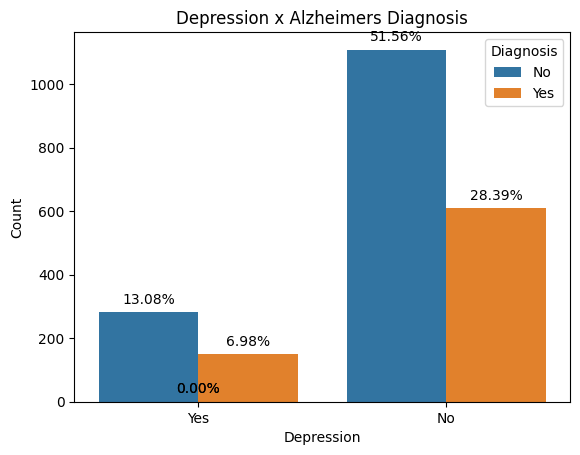

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='Depression', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Depression x Alzheimers Diagnosis')
plt.xlabel('Depression')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

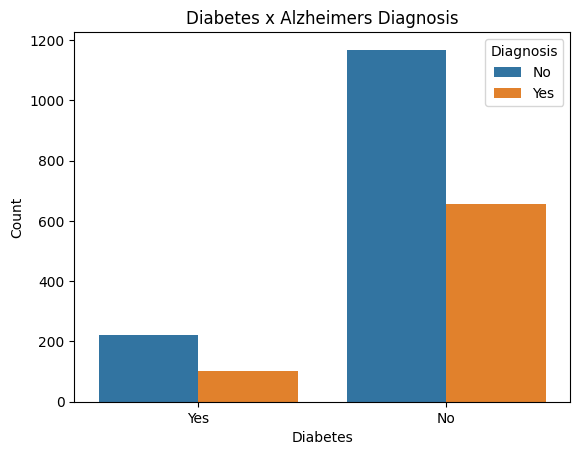

In [ ]:
# Plot a countplot of Diabetes vs Diagnosis

sns.countplot(x='Diabetes', hue='Diagnosis', data=medical_history)
plt.title('Diabetes x Alzheimers Diagnosis')
plt.xlabel('Diabetes')
plt.ylabel('Count')

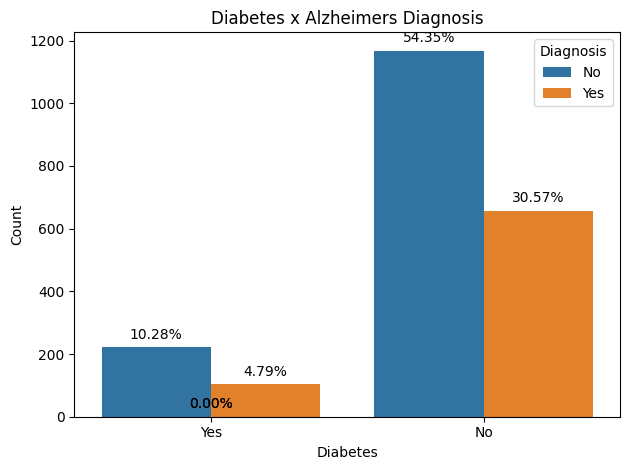

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='Diabetes', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Diabetes x Alzheimers Diagnosis')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

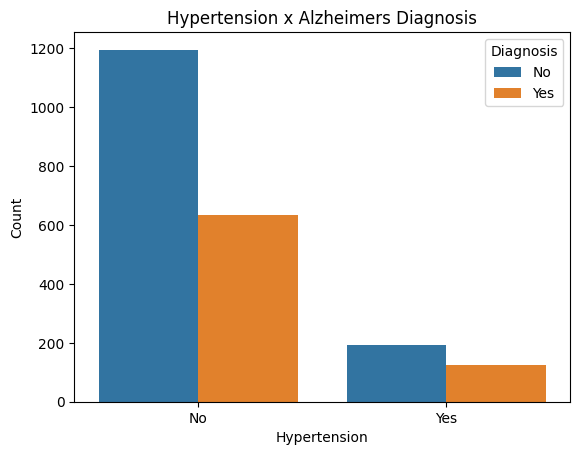

In [ ]:
# Plot a countplot of Hypertension vs Diagnosis

sns.countplot(x='Hypertension', hue='Diagnosis', data=medical_history)
plt.title('Hypertension x Alzheimers Diagnosis')
plt.xlabel('Hypertension')
plt.ylabel('Count')

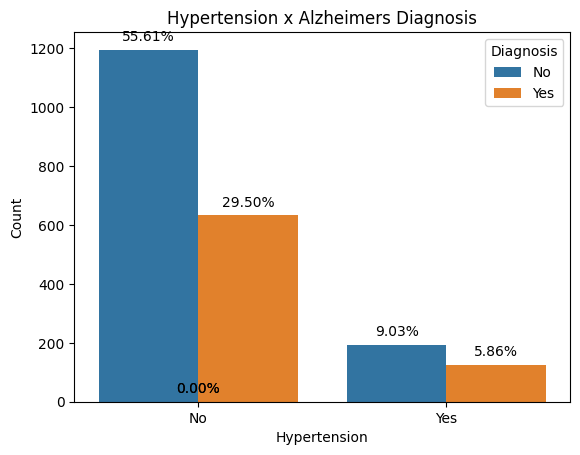

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='Hypertension', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Hypertension x Alzheimers Diagnosis')
plt.xlabel('Hypertension')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

Text(0, 0.5, 'Count')

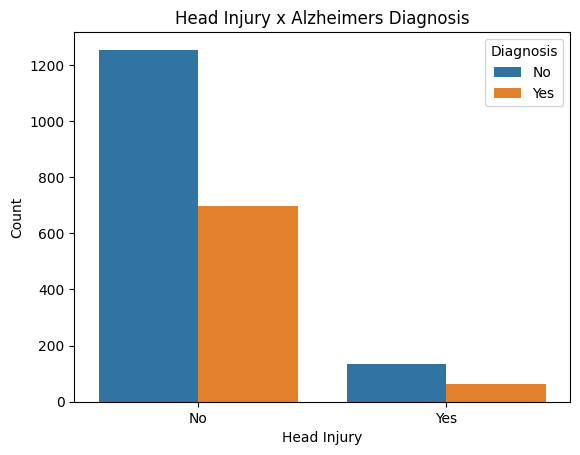

In [ ]:
# Plot a countplot of Head Injury vs Diagnosis


sns.countplot(x='HeadInjury', hue='Diagnosis', data=medical_history)
plt.title('Head Injury x Alzheimers Diagnosis')
plt.xlabel('Head Injury')
plt.ylabel('Count')

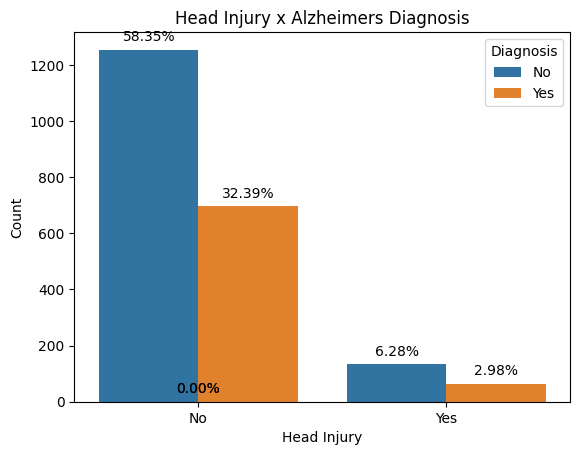

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Cardiovascular Disease vs Diagnosis
ax = sns.countplot(x='HeadInjury', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Head Injury x Alzheimers Diagnosis')
plt.xlabel('Head Injury')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

# **CLINICAL MEASUREMENTS**
* Systolic BP
* Diastolic BP
* Cholesterol Total
* Cholesterol LDL
* Cholesterol HDL
* Cholesterol Triglycerides


In [ ]:
#Create a Clinical Measurement dataframe
clinical_measurements = alzheimer_df_yesno[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','Diagnosis']]
clinical_measurements

SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
0            142           72        242.366840       56.150897   
1            115           64        231.162595      193.407996   
2             99          116        284.181858      153.322762   
3            118          115        159.582240       65.366637   
4             94          117        237.602184       92.869700   
...          ...          ...               ...             ...   
2144         122          101        280.476824       94.870490   
2145         152          106        186.384436       95.410700   
2146         115          118        237.024558      156.267294   
2147         103           96        242.197192       52.482961   
2148         166           78        283.396797       92.200064   

      CholesterolHDL  CholesterolTriglycerides Diagnosis  
0          33.682563                162.189143        No  
1          79.028477                294.630909        No  
2          69.772292                 83.638324        No  
3          68.457491                277.577358        No  
4          56.874305                291.198780        No  
...              ...                       ...       ...  
2144       60.943092                234.520123       Yes  
2145       93.649735                367.986877       Yes  
2146       99.678209                294.802338       Yes  
2147       81.281111                145.253746       Yes  
2148       81.920043                217.396873        No  

[2149 rows x 7 columns]

In [ ]:
#Check if Blood Pressure is appropriate value, if not, drop the value
def check_and_drop(SystolicBP, DiastolicBP):
    if DiastolicBP > SystolicBP:
        return None, None
    else:
        return SystolicBP, DiastolicBP

In [ ]:
#Apply the check_and_drop function to the BP columns

clinical_measurements['SystolicBP'], clinical_measurements['DiastolicBP'] = zip(*clinical_measurements.apply(lambda row: check_and_drop(row['SystolicBP'], row['DiastolicBP']), axis=1))
clinical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SystolicBP                1973 non-null   float64
 1   DiastolicBP               1973 non-null   float64
 2   CholesterolTotal          2149 non-null   float64
 3   CholesterolLDL            2149 non-null   float64
 4   CholesterolHDL            2149 non-null   float64
 5   CholesterolTriglycerides  2149 non-null   float64
 6   Diagnosis                 2149 non-null   object 
dtypes: float64(6), object(1)
memory usage: 117.6+ KB


<ipython-input-127-de858906e845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_measurements['SystolicBP'], clinical_measurements['DiastolicBP'] = zip(*clinical_measurements.apply(lambda row: check_and_drop(row['SystolicBP'], row['DiastolicBP']), axis=1))


In [ ]:
display(clinical_measurements['SystolicBP'].describe())
display(clinical_measurements['DiastolicBP'].describe())

count    1973.000000
mean      137.436898
std        24.626823
min        90.000000
25%       117.000000
50%       138.000000
75%       158.000000
max       179.000000
Name: SystolicBP, dtype: float64

count    1973.000000
mean       88.028383
std        17.097537
min        60.000000
25%        73.000000
50%        88.000000
75%       103.000000
max       119.000000
Name: DiastolicBP, dtype: float64

In [ ]:
# Plot the Systolic Blood Pressure findings on a box plot with diagnosis
alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('SystolicBP:Q', scale=alt.Scale(domain=[80, 190])))


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Plot the Diastolic Blood Pressure findings on a box plot with diagnosis
alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('DiastolicBP:Q', scale=alt.Scale(domain=[50, 130])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Make a box plot that compares cholesterol total to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('CholesterolTotal:Q', scale=alt.Scale(domain=[100, 325])))


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
display(clinical_measurements['CholesterolHDL'].describe())
display(clinical_measurements['CholesterolLDL'].describe())
display(clinical_measurements['CholesterolTriglycerides'].describe())
display(clinical_measurements['CholesterolTotal'].describe())

count    2149.000000
mean       59.463533
std        23.139174
min        20.003434
25%        39.095698
50%        59.768237
75%        78.939050
max        99.980324
Name: CholesterolHDL, dtype: float64

count    2149.000000
mean      124.335944
std        43.366584
min        50.230707
25%        87.195798
50%       123.342593
75%       161.733733
max       199.965665
Name: CholesterolLDL, dtype: float64

count    2149.000000
mean      228.281496
std       101.986721
min        50.407194
25%       137.583222
50%       230.301983
75%       314.839046
max       399.941862
Name: CholesterolTriglycerides, dtype: float64

count    2149.000000
mean      225.197519
std        42.542233
min       150.093316
25%       190.252963
50%       225.086430
75%       262.031657
max       299.993352
Name: CholesterolTotal, dtype: float64

In [ ]:
# Make a box plot that compares cholesterolLDL to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('CholesterolLDL:Q', scale=alt.Scale(domain=[25, 210])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Make a box plot that compares cholesterolHDL to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('CholesterolHDL:Q', scale=alt.Scale(domain=[0, 110])))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
 #Make a box plot that compares cholesteroltriglicerides to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y=alt.Y('CholesterolTriglycerides:Q', scale=alt.Scale(domain=[0, 410])))


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# **SYMPTOMS**
* Confusion
* Disorientation
* Personality Changes
* Difficulty Completing Tasks
* Forgetfulness
* Memory Complaints
* Behavioral Problems


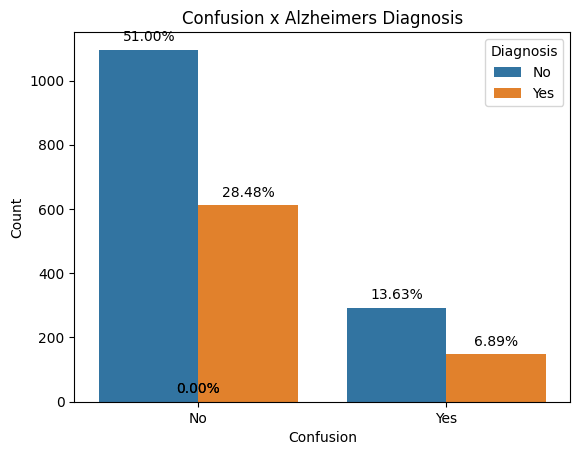

In [ ]:
# Calculate total number of rows in the dataset for percentage calculations
total = len(alzheimer_df_yesno)

# Plot a countplot of Education Level vs Diagnosis
ax = sns.countplot(x='Confusion', hue='Diagnosis', data=alzheimer_df_yesno)

# Title and labels
plt.title('Confusion x Alzheimers Diagnosis')
plt.xlabel('Confusion')
plt.ylabel('Count')

# Adding percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
#Create a column that totals the number of symptoms the patient has
alzheimer_total_symptoms = alzheimer_df.copy()
alzheimer_total_symptoms['Total Symptoms Count'] = alzheimer_total_symptoms[['Confusion', 'Disorientation',
                                                     'PersonalityChanges', 'DifficultyCompletingTasks',
                                                     'Forgetfulness', 'MemoryComplaints', 'BehavioralProblems']].sum(axis=1)
alzheimer_total_symptoms.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   Total Symptoms Count  
0                     1  
1                     1  
2                     2  
3                     1  
4                     2  

[5 rows x 35 columns]

In [ ]:
#Create a column that states TRUE if the patient has symptoms and YES diagnosis
alzheimer_total_symptoms['Symptoms vs Diagnosis'] = (alzheimer_total_symptoms['Total Symptoms Count']!=0)& (alzheimer_df['Diagnosis']==1)
alzheimer_total_symptoms.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  BehavioralProblems  \
0           13.297218          6.327112     1.347214  ...                   0   
1            4.542524          7.619885     0.518767  ...                   0   
2           19.555085          7.844988     1.826335  ...                   0   
3           12.209266          8.428001     7.435604  ...                   1   
4           18.454356          6.310461     0.795498  ...                   0   

        ADL  Confusion  Disorientation  PersonalityChanges  \
0  1.725883          0               0                   0   
1  2.592424          0               0                   0   
2  7.119548          0               1                   0   
3  6.481226          0               0                   0   
4  0.014691          0               0                   1   

   DifficultyCompletingTasks  Forgetfulness  Diagnosis  Total Symptoms Count  \
0                          1              0          0                     1   
1                          0              1          0                     1   
2                          1              0          0                     2   
3                          0              0          0                     1   
4                          1              0          0                     2   

   Symptoms vs Diagnosis  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 36 columns]

In [ ]:
#Count the number of TRUE values in Symptoms vs diagnosis
s_vs_d = alzheimer_total_symptoms['Symptoms vs Diagnosis'].value_counts()
s_vs_d

Symptoms vs Diagnosis
False    1500
True      649
Name: count, dtype: int64

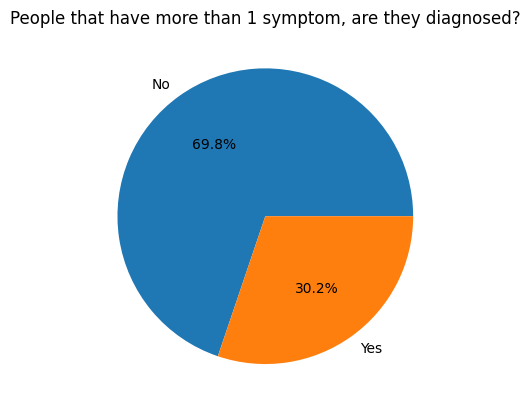

In [ ]:
#Make a pie chart of the number of people who have symptoms and have a diagnosis (all people in this chart have symptoms, do they have a diagnosis?)
plt.pie(s_vs_d, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('People that have more than 1 symptom, are they diagnosed?')
plt.show()

In [ ]:
#How many people with 4 or more symptoms are diagnosed?
alzheimer_total_symptoms[alzheimer_total_symptoms['Total Symptoms Count'] >= 4]['Diagnosis'].value_counts()

Diagnosis
1    24
0    23
Name: count, dtype: int64

# **CORRELATION**

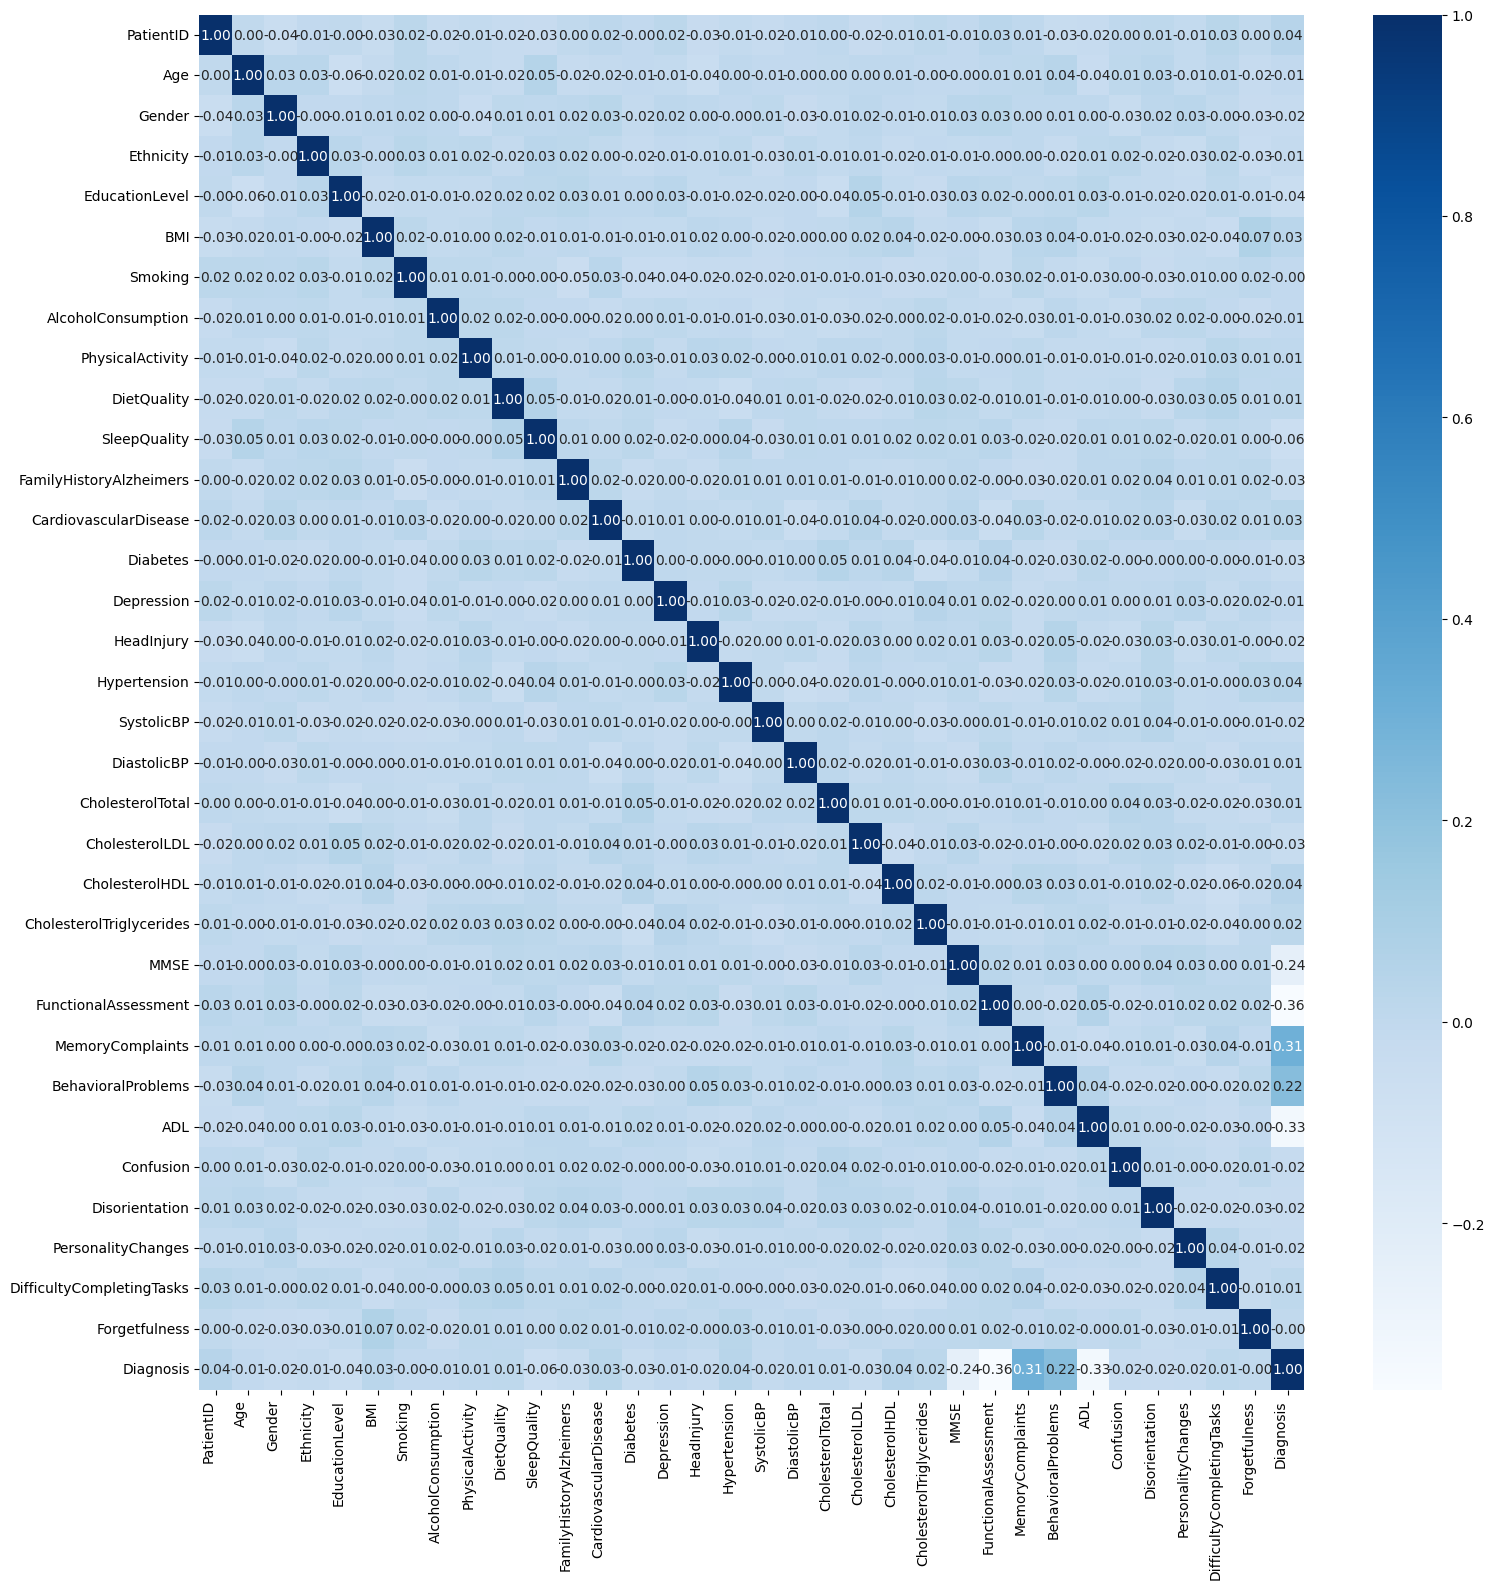

In [ ]:
# Create a Heatmap analysis of the entire data
plt.figure(figsize = (16,16))
sns.heatmap(alzheimer_df.corr(), cmap = 'Blues', annot = True, fmt = ".2f")
plt.xticks(rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
# Show the correlations between the features
correlations = alzheimer_df.corr()['Diagnosis'].abs().sort_values(ascending=False)
correlations

Diagnosis                    1.000000
FunctionalAssessment         0.364898
ADL                          0.332346
MemoryComplaints             0.306742
MMSE                         0.237126
BehavioralProblems           0.224350
SleepQuality                 0.056548
EducationLevel               0.043966
CholesterolHDL               0.042584
PatientID                    0.041019
Hypertension                 0.035080
FamilyHistoryAlzheimers      0.032900
CholesterolLDL               0.031976
Diabetes                     0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Disorientation               0.024648
CholesterolTriglycerides     0.022672
HeadInjury                   0.021411
Gender                       0.020975
PersonalityChanges           0.020627
Confusion                    0.019186
SystolicBP                   0.015615
Ethnicity                    0.014782
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption           0.007618
CholesterolTotal             0.006394
PhysicalActivity             0.005945
Depression                   0.005893
Age                          0.005488
DiastolicBP                  0.005293
Smoking                      0.004865
Forgetfulness                0.000354
Name: Diagnosis, dtype: float64

In [ ]:
# Print the top 5 correlations between the features
correlations.head()

Diagnosis               1.000000
FunctionalAssessment    0.364898
ADL                     0.332346
MemoryComplaints        0.306742
MMSE                    0.237126
Name: Diagnosis, dtype: float64